#Reading data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
# from neural_net import NeuralNet
# from collections import Counter

PATH_TRAIN_IMAGES = "data/train-images-idx3-ubyte"
PATH_TRAIN_LABELS = "data/train-labels-idx1-ubyte"

PATH_TEST_IMAGES = "data/t10k-images-idx3-ubyte"
PATH_TEST_LABELS = "data/t10k-labels-idx1-ubyte"

COL_SIZE = 28


def load_datasets(set_name="train"):
    if set_name == "train":
        images, labels = loadlocal_mnist(
            images_path=PATH_TRAIN_IMAGES,
            labels_path=PATH_TRAIN_LABELS)
    else:
        images, labels = loadlocal_mnist(
            images_path=PATH_TEST_IMAGES,
            labels_path=PATH_TEST_LABELS)

    return images, labels

def show_image(array, label=None):
    img = np.reshape(array, (COL_SIZE, COL_SIZE))
    plt.title(f"Label: {label}")
    plt.imshow(img, cmap='gray')
    plt.show()
    
def show_image_with_index(index: int, set_name="train"):
    images, labels = load_datasets(set_name)
    img = images[index]
    lbl = labels[index]
    print(lbl)
    show_image(img, lbl)

def normalize_pixel_values(arr: np.ndarray, max_val=255.0):
    normalized_arr = arr.astype('float32')
    normalized_arr /= max_val
    return normalized_arr


In [4]:
images, labels = load_datasets()

3


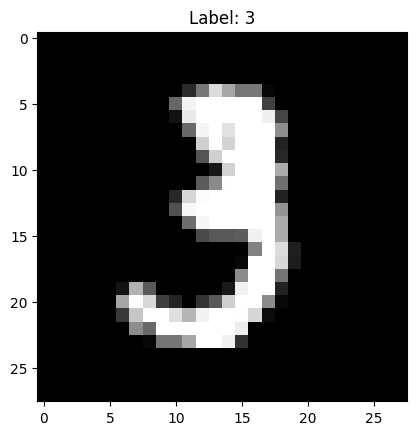

In [5]:

show_image_with_index(10)

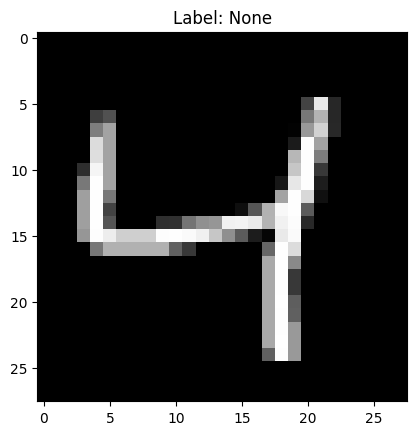

In [6]:
show_image(images[2])

In [48]:
images[200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     